In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [2]:
df=pd.read_csv("Salary_Data .csv")
df.head()

,YearsExperience,Salary
0,1.0,10000
1,1.5,15000
2,2.0,20000
3,2.5,25000
4,3.0,30000


In [3]:
df.shape

(30, 2)

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
numerical_data=df.select_dtypes(include=["int64","float64"])
for x in numerical_data:
    df[x].fillna(df[x].mean(),inplace=True)
df.isnull().sum()

/var/folders/b9/80gkjycn17q3n74hj3k9ngzr0000gn/T/ipykernel_930/2460864035.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mean(),inplace=True)


YearsExperience    0
Salary             0
dtype: int64

In [6]:
numerical_data=df.select_dtypes(include=["object","category"])
for x in numerical_data:
    df[x].fillna(df[x].mode()[0],inplace=True)
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.head()

,YearsExperience,Salary
0,1.0,10000
1,1.5,15000
2,2.0,20000
3,2.5,25000
4,3.0,30000


In [8]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,YearsExperience,Salary
0,1.0,10000
1,1.5,15000
2,2.0,20000
3,2.5,25000
4,3.0,30000


In [9]:
X=df.drop(["YearsExperience"],axis=1) 
y=df["YearsExperience"] 

In [10]:
X.head()

,Salary
0,10000
1,15000
2,20000
3,25000
4,30000


In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y, test_size=0.20,random_state=1)

In [12]:
from sklearn.pipeline import Pipeline
LinearModel=Pipeline([("scaler",StandardScaler()),("Regression",LinearRegression())])
LinearModel.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [13]:
pred1=LinearModel.predict(xtest)
pred1

array([ 9.69088031, 11.53893042,  6.45679262, 10.61490537,  8.30484273,
       11.0769179 ])

In [14]:
print('MAE',mean_absolute_error(ytest,pred1))
print('MAPE',mean_absolute_percentage_error(ytest,pred1))
print('MSE',mean_squared_error(ytest,pred1))
print('R2 SCORE',r2_score(ytest,pred1))

MAE 0.1972115578904822
MAPE 0.025941877872820557
MSE 0.059776510556074365
R2 SCORE 0.9834782773127165


In [15]:
outcome={
    "Actual salary": ytest,
    "Predicted salary": pred1
}
df3 =pd.DataFrame(outcome)
df3

,Actual salary,Predicted salary
17,9.5,9.690880
21,11.5,11.538930
10,6.0,6.456793
19,10.5,10.614905
14,8.0,8.304843
20,11.0,11.076918


<Axes: xlabel='YearsExperience'>

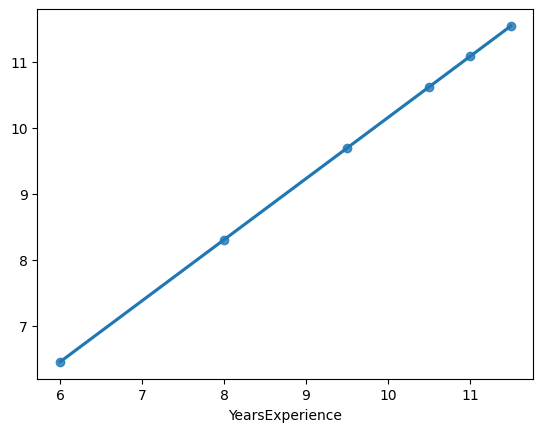

In [16]:
sns.regplot(x=ytest,y=pred1)

In [17]:
from sklearn.pipeline import Pipeline
LinearModel2=Pipeline([("scaler",StandardScaler()),("Regression",DecisionTreeRegressor())])
LinearModel2.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Regression', DecisionTreeRegressor())])

In [18]:
pred2=LinearModel2.predict(xtest)
pred2

array([ 9. , 12. ,  5.5, 10. ,  7.5, 10. ])

In [19]:
print('MAE',mean_absolute_error(ytest,pred2))
print('MAPE',mean_absolute_percentage_error(ytest,pred2))
print('MSE',mean_squared_error(ytest,pred2))
print('R2 SCORE',r2_score(ytest,pred2))

MAE 0.5833333333333334
MAPE 0.06341188527973425
MSE 0.375
R2 SCORE 0.8963531669865643


In [20]:
outcome={
    "Actual salary": ytest,
    "Predicted salary": pred2
}
df4 =pd.DataFrame(outcome)
df4

,Actual salary,Predicted salary
17,9.5,9.0
21,11.5,12.0
10,6.0,5.5
19,10.5,10.0
14,8.0,7.5
20,11.0,10.0


<Axes: xlabel='YearsExperience'>

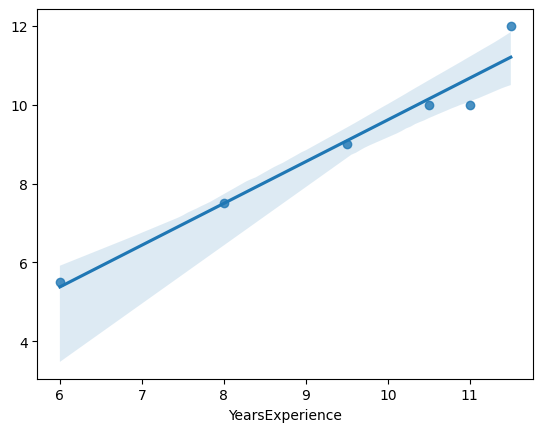

In [21]:
sns.regplot(x=ytest,y=pred2)